## SNU PPSML - Machine Learning Exercise 3 (Note09)

#### **Contents**
---
* ML exercise 1: Gradient Descent [Optimization @ ML] (HW05)  

---
* ML exercise 2: Neural Network [Representation @ ML] (실습과제 11/5-8 & 11/9 강의)
    - 입력 속성데이터와 지도라벨값 $\{(x_i, y_i)\}$ @ 인코딩: 입력과 출력층의 설정  

    - 순전파 신경망(def feedforward())의 구성을 위한 여러가지 파라메터들     
        - $N_{layers}$ & $N_{nodes}$ in each layer
        - 가중치와 편향치 ($W$ & $B$)
        - 가중합(퍼셉트론 입력) : 
        
        > $a_j=W_{ji} f_i(a_i)$ (전층의 출력 $f_i$에 대한 가중합)
        
        - 활성화 함수(출력) : $f_j(a_j)$
        
        > $f(a)=\frac{1}{1+\exp^{-a}}$ for sigmoid  
        
        > $f(a)=\tanh(a)$ for tanh  
        
        > $f(a_k)=\frac{\exp[a_k]}{\sum_{k'}\exp[a_{k'}]}$ for softmax  
        
        > $f(a)=a$ for $ a > 0$ otherwise $0$ (ReLU)
        
        - 데이터의 순전파를 통한 최종 출력값 얻기: def feedforward(input_features)
        - ...
        
    - 오차보정의 역전파:  
    
        - 지도라벨값의 인코딩과 오차함수($E(w;x)$)의 정의
        - $\delta_j$ (가중합 $a_j$에 대한 오차보정항 $\equiv\frac{\partial E}{\partial a_j}$)
        - $\delta_j$를 통한 가중치보정 역전파의 구현: def backpropagate(target_label)
        - ...
        
    - 많은 데이터에 대한 학습 알고리즘 구현
    - check a contour of MLP's probability output for classification of 2D data  
    
---   
* **ML exercise 3: Training a NN for Regression & Classification [Evaluation, Rep, Opt @ ML] (HW06 & note09)**
    - batch GD, mini-batch GD, stochastic GD [HW06]  
        - Visualize the minimizers in 2D
    - **Validation of model, Over-fitting, Bias & Variance**  
        - Visualize an over-fitted status [<-- note09]
    - **Evaluation of model performance**
        - error(loss), accuracy (...) [HW06]
        - NN score & ROC(Receiver Operating Characteristic) curve [<-- note09]


In [27]:
# Printing all outputs in a cell (not only the last output)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

----
### ** 3. Evaluation @ ML ** 

### For Supervised Learning (note09)

*1) batch gradient descent, mini-batch GD, stochastic GD (HW06)*
    - [회귀(Regression)]
    
**2) Validation of model** 
    - [과적합 (Over-fitting)상태의 확인] (here, note09)

**3) Evaluation of model performance**      
    - [error/loss function] & [accuracy] (HW06)
    => (implement new error functions in your NN class : 'binary cross-entropy' & 'categorical cross-entropy')

    - [neural network score] (note09)
    - [ROC (Receiver Operating Characteristic) curve] (note09)
    - & [its AUC (area under curve)]


---
#### ** 2) Validation of Model in [이종분류(Binary Classification)]** 
   
   - **과적합 (Over-Fitting) 상태의 발생**
   
       $x_1,\,x_2$ 2차원 평면에 **두 종류**의 데이터가 분포해있을때, 임의의 $(x_1,x_2)$위치의 테스트 데이터가 각각의 종에 속할 확률을 예측하는, 이종 분류 신경망을 건설하고 훈련시켜보자.
       - 신경망의 구조(표현능력, capacity)가 동일할 때 데이터의 양에 따라서 학습된 분류 모형이 어떻게 달라지는 지 체크해보자.  
       - 과적합 상태의 예측모형을 matplotlib를 활용하여 시각화해보고, 기계학습에 있어서 왜 데이터의 양이 중요한지 체험해보자. 
       - 학습 상태를 모니터링하면서, 과적합 상태로의 과도한 학습을 방지할 수 있는 방안을 생각해보자 
        

* 훈련 & 테스트 데이터의 로딩 그리고 시각화

In [39]:
import numpy as np
data_np_circles = np.load('data/2Classes_2d_circles.npy')
data_np_moons = np.load('data/2Classes_2d_moons.npy')
data_np_spirals = np.load('data/2Classes_2d_spirals.npy')
print (len(data_np_circles))
print (len(data_np_moons))
print (len(data_np_spirals))

10000
10000
20000


In [30]:
data_np_circles.shape
data_np_circles  # 0 = > o ne-hot [1,0]  1=>  [0,1]

array([[ 1.        ,  0.41716959, -0.0201462 ],
       [ 0.        ,  0.32946142, -1.73946092],
       [ 0.        ,  1.88161571, -0.2243498 ],
       ..., 
       [ 0.        ,  0.60498693,  1.43561959],
       [ 1.        ,  0.41340282, -0.07906887],
       [ 0.        ,  1.75611841,  0.80208405]])

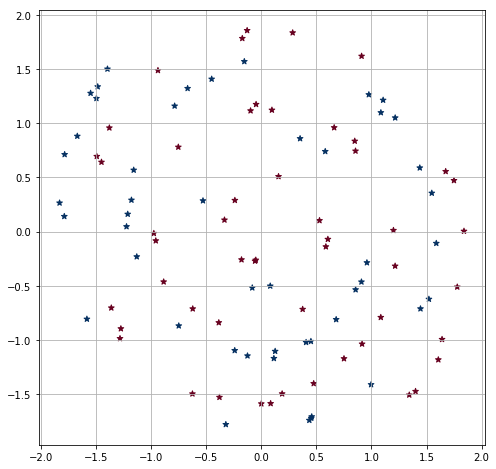

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from itertools import cycle, islice
%matplotlib inline

# data = data_np_circles
# 100개 spiral data
data = data_np_spirals[:100]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax.scatter(data[:,1],data[:,2], c=data[:,0], cmap=cm, marker='*')

ax.grid(True)

plt.show()

In [18]:
%reload_ext autoreload
%autoreload 2

import NNfactory

In [19]:
model_str = '2:identity|'+4*'100:relu|'+'2:softmax'
lr = 0.001
name_tag = 'spirals_lr'+str(lr)

In [20]:
mynn = NNfactory.MLP(model_structure=model_str, \
                     model_nametag=name_tag, \
                     learning_rate=lr, \
                     encoding='one-hot')


 * 다음과 같은 구조의 다층퍼셉트론 연결이 초기화 되었습니다 *

 > 모델이름 = spirals_lr0.001
 > 총 층수 (입력 + 은닉(s) + 출력) =  6
 > 각 층에서의 노드수 =  [2, 100, 100, 100, 100, 2]
 > 각 층에서의 활성화 함수 =  ['identity', 'relu', 'relu', 'relu', 'relu', 'softmax']
 > 학습률(Learning Rate) =  0.001
 > 지도라벨 인코딩 방식 =  one-hot


In [21]:
from time import sleep
import sys
import numpy as np

# 훈련 준비
data_type=None # None
encoding='one-hot' #'integer' # 'float'

# 훈련 & 테스트 데이터 준비
# n_data_tot=len(training_data_list)
n_data_max=5000  # 훈련에 사용할 데이터 갯수 (max = 10000)
n_data_test=100  # 테스트에 사용할 테이터 갯수 (10000 - n_data_max)

## 훈련 데이터
training_data_list = data_np_spirals[:n_data_max]

## 테스트 데이터
test_data_list = data_np_spirals[-n_data_test:]

# 최대학습주기 설정
epochs = 200 #10000

# 훈련 데이터 게이지 파라메터 설정
# n_data = n_data_max
# dn_data = int(n_data/20) 
# print (dn_data)

In [22]:
# 설정된 최대학습주기동안 훈련

for e in range(epochs):

    id_data = 0
    
    for data in training_data_list[:n_data_max]:
        
        # 프로세스 게이지
        id_data += 1
#         if (id_data%dn_data==0):
#             sys.stdout.write('\r')
#             sys.stdout.write(' [%-20s] %d%%' % ( '='*(id_data//dn_data), 5*(id_data//dn_data)))
#             sys.stdout.flush()
#             sleep(0.01)
        
        # 입력/지도 데이터 가공 
        if data_type == 'mnist':
            # split the mnist data by the ',' commas
            all_values = data.split(',')
            # 입력 데이터 스케일링 
            input_list = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
            # 지도 라벨 벡터 가공 (shape = (10,))
            target_list = np.zeros(10) #mynn.n_nodes[-1])
            # all_values[0] is the target label for this data
            target_list[int(all_values[0])] = 1.0
            
        else:
        
            input_list = data[1:] #np.asfarray(all_values[1:])        
            target_origin = data[0]
            
            if encoding == 'one-hot':

                target_list = np.zeros(mynn.n_nodes[-1])
                target_list[int(data[0])] = 1
    
            elif encoding == 'integer':
                
                target_list = np.zeros(1)
                target_list[0] = int(data[0])

            elif encoding == 'float':
                
                target_list = np.zeros(1)
                target_list[0] = data[0]
                
            else:
                raise ValueError(' => check your encoding scheme. ')

        
        mynn.train(input_list, target_list)
        
        pass

    
    if (e%10==0):
        print (' --------------------------------------')
        print(' * epoch = {}'.format(e+1))
        print(' > 훈련 샘플에 대한 성능 (정확도 & 평균에러) ')
        mynn.check_accuracy_error(training_data_list, 0, n_data_max-1, data_type=None)
        print('')
        print(' > 테스트 샘플에 대한 성능 (정확도 & 평균에러) ')
        mynn.check_accuracy_error(test_data_list, 0, n_data_test-1, data_type=None)

#     print('\n')
    
    pass


 --------------------------------------
 * epoch = 1
 > 훈련 샘플에 대한 성능 (정확도 & 평균에러) 
 
 * 현재 정확도  =  0.5746  | (정답수)/(테스트 데이터수) =  2873 / 5000
 * 현재 평균에러 =  0.237122098682

 > 테스트 샘플에 대한 성능 (정확도 & 평균에러) 
 
 * 현재 정확도  =  0.54  | (정답수)/(테스트 데이터수) =  54 / 100
 * 현재 평균에러 =  0.233493134209
 --------------------------------------
 * epoch = 11
 > 훈련 샘플에 대한 성능 (정확도 & 평균에러) 
 
 * 현재 정확도  =  0.6462  | (정답수)/(테스트 데이터수) =  3231 / 5000
 * 현재 평균에러 =  0.223247117486

 > 테스트 샘플에 대한 성능 (정확도 & 평균에러) 
 
 * 현재 정확도  =  0.62  | (정답수)/(테스트 데이터수) =  62 / 100
 * 현재 평균에러 =  0.219764272809
 --------------------------------------
 * epoch = 21
 > 훈련 샘플에 대한 성능 (정확도 & 평균에러) 
 
 * 현재 정확도  =  0.6868  | (정답수)/(테스트 데이터수) =  3434 / 5000
 * 현재 평균에러 =  0.208614034406

 > 테스트 샘플에 대한 성능 (정확도 & 평균에러) 
 
 * 현재 정확도  =  0.68  | (정답수)/(테스트 데이터수) =  68 / 100
 * 현재 평균에러 =  0.204597287266
 --------------------------------------
 * epoch = 31
 > 훈련 샘플에 대한 성능 (정확도 & 평균에러) 
 
 * 현재 정확도  =  0.7492  | (정답수)/(테스트 데이터수) =  3746 / 5000
 * 현

KeyboardInterrupt: 

---
* 훈련한 모형의 저장

훈련된 모형은 NNfactory클래스 안의 save_model메소드를 사용하여 .npy포맷의 numpy array로 저장할 수 있다.

In [25]:
mynn.save_model(fname='mlp_spirals_2relu_overfit.npy', nametag='spiral_2relu_overfit')
# mynn.save_model(fname='mlp_spirals_2relu_well_done.npy', nametag='spiral_2relu_well_done')
# mynn.save_model(fname='mlp_spirals_2relu_medium.npy', nametag='spiral_2relu_medium')


---
* 저장된 모형 불러오기 :

저장된 .npy파일로부터 신경망정보가 담긴 넘파이 배열을 직접 로드하고, 이 넘파이 배열을 새 신경망 인스턴스 생성에 사용하여 저장된 모형과 똑같은 신경망을 로드한다.

In [26]:
mynn_npy = np.load('mlp_spirals_2relu_overfit.npy')
# mynn_npy = np.load('mlp_spirals_2relu_well_done.npy')
# mynn_npy = np.load('mlp_spirals_2relu_medium.npy')

mynn_load = NNfactory.MLP(load_model_np=mynn_npy)


 * 다음과 같은 구조의 다층퍼셉트론 모형이 "load_model_np" 정보로부터 로드되었습니다. *

 > 모델이름 = spiral_2relu_medium
 > 총 층수 (입력 + 은닉(s) + 출력) =  6
 > 각 층에서의 노드수 =  [2, 100, 100, 100, 100, 2]
 > 각 층에서의 활성화 함수 =  ['identity', 'relu', 'relu', 'relu', 'relu', 'softmax']
 > 학습률(Learning Rate) =  0.001
 > 지도라벨 인코딩 방식 =  one-hot


---
* 학습한 확률 모형을 시각화해보기 (확률모형의 출력을 2d에 contour plot해보자)

x_mesh.shape  =  (100, 100)
y_mesh.shape  =  (100, 100)
P_mesh.shape  =  (100, 100)


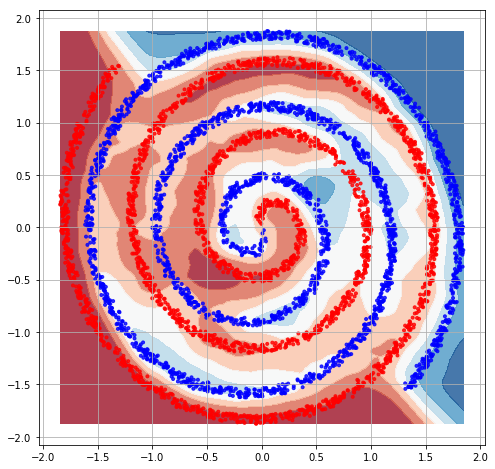

In [27]:

# ==================================== #
# * Plotting model prediction contour 
# ==================================== #
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from itertools import cycle, islice


# 데이터 로드 & 저장파일이름설정
data = data_np_spirals[:n_data_max]
savefigfile = 'plot_spirals_trained_overfit.png'
# savefigfile = 'plot_spirals_trained_well_done.png'
# savefigfile = 'plot_spirals_trained_medium.png'


# 등고선 플랏을 위한 그리드 설정
x_min, x_max = data[:,1].min(), data[:,1].max()
y_min, y_max = data[:,2].min(), data[:,2].max()
n_x = 100
n_y = 100
x = np.linspace(x_min, x_max, n_x)
y = np.linspace(y_min, y_max, n_y)
X, Y = np.meshgrid(x, y)

# 각 (X[j,i],Y[j,i]) 위치에서의 신경망 출력(~첫번째 클래스일 확률)을 담을 배열 설정
P = np.zeros(n_x*n_y).reshape(n_y,n_x)

for j in range(n_y):
    for i in range(n_x):    
        P[j,i] = mynn_load.feedforward([X[j,i],Y[j,i]])[0]
    
print('x_mesh.shape  = ',X.shape)
print('y_mesh.shape  = ',Y.shape)
print('P_mesh.shape  = ',P.shape)


# 신경망이 학습한 확률모형의 등고선을 데이터와 함께 시각화
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#0000FF', '#FF0000'])

ax.contourf(X, Y, P, cmap=cm, alpha=.8)
ax.scatter(data[:,1],data[:,2], c=data[:,0], cmap=cm_bright, alpha=0.8, marker='.')

ax.grid(True)
fig.savefig(savefigfile)

plt.show()

---
#### ** 3) Evaluation of model performance in [이종분류(Binary Classification)]** 
   
1. New error function implementation [HW06]
   
** 2. Neural Network score/prediction distribution in 1D **
   
위에서 학습시킨 예측모형을 활용하여, 주어진 데이터에 대한 2종의 신경망 출력  
> $x_i\rightarrow f(x_i;W_{trained}) \rightarrow [p_0, p_1]$  
with $p_0+p_1=1$

이 있을때, 그 중 $p_0$값을 변수로 한 히스토그램을, 모든 테스트 데이터의 각 클래스에 대하여 그려보자.  
(각 클래스 데이터의 $p_0$값 분포가 어떻게 되는지 확인해보자) 
   


---
* 저장된 모형 불러오기 :

저장된 .npy파일로부터 신경망정보가 담긴 넘파이 배열을 직접 로드하고, 이 넘파이 배열을 새 신경망 인스턴스 생성에 사용하여 저장된 모형과 똑같은 신경망을 로드한다.

In [28]:
# mynn_npy = np.load('mlp_spirals_2relu_overfit.npy')
# mynn_npy = np.load('mlp_spirals_2relu_well_done.npy')
mynn_npy = np.load('mlp_spirals_2relu_medium.npy')

mynn_load = NNfactory.MLP(load_model_np=mynn_npy)


 * 다음과 같은 구조의 다층퍼셉트론 모형이 "load_model_np" 정보로부터 로드되었습니다. *

 > 모델이름 = spiral_2relu_medium
 > 총 층수 (입력 + 은닉(s) + 출력) =  6
 > 각 층에서의 노드수 =  [2, 100, 100, 100, 100, 2]
 > 각 층에서의 활성화 함수 =  ['identity', 'relu', 'relu', 'relu', 'relu', 'softmax']
 > 학습률(Learning Rate) =  0.001
 > 지도라벨 인코딩 방식 =  one-hot


In [29]:
# ==================================== #
# * Plotting model prediction contour 
# ==================================== #
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from itertools import cycle, islice


# 데이터 로드 & 저장파일이름설정
data = data_np_spirals[:n_data_max]
# savefigfile = 'plot_spirals_trained_overfit.png'
# savefigfile = 'plot_spirals_trained_well_done_p0.png'
savefigfile = 'plot_spirals_trained_medium_p0.png'


In [38]:
predict = np.zeros((len(data),1))
# add a column for NN prediction
data2 = np.c_[data,predict]
data2
n_data_max

5000

In [31]:
for i in range(len(data2)):
    data2[i,3] = mynn_load.feedforward(data2[i,1:3])[0]
    
        

In [32]:
b_0 = data2[:,0]==1.0
b_1 = data2[:,0]==0.0

In [201]:
b_0

array([False,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False,  True, False,  True, False,
       False, False,  True,  True, False,  True, False, False, False,
        True,  True,  True, False, False, False,  True, False, False,
        True, False,  True, False, False,  True, False,  True,  True,
       False,  True, False, False,  True,  True,  True,  True,  True,  True], dtype=bool)

In [202]:
b_1

array([ True, False, False,  True, False, False, False, False, False,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True, False, False,  True, False,  True,  True,  True,
       False, False, False,  True,  True,  True, False,  True,  True,
       False,  True, False,  True,  True, False,  True, False, False,
        True, False,  True,  True, False, False, False, False, False, False], dtype=bool)

In [33]:
data2_c0 = data2[b_0]
data2_c1 = data2[b_1]

In [204]:
data2_c1

array([[  0.00000000e+00,   1.60722259e+00,  -1.18295323e+00,
          3.24423248e-03],
       [  0.00000000e+00,  -4.62963649e-02,   1.17519091e+00,
          2.48780449e-02],
       [  0.00000000e+00,  -1.49151875e+00,   6.95028186e-01,
          3.40911220e-02],
       [  0.00000000e+00,  -7.51630879e-01,   7.80634232e-01,
          2.06678537e-02],
       [  0.00000000e+00,  -1.27287805e+00,  -8.96359669e-01,
          1.37821738e-02],
       [  0.00000000e+00,  -9.73764103e-01,  -1.60662022e-02,
          5.30926520e-02],
       [  0.00000000e+00,  -3.78473513e-01,  -1.52969718e+00,
          8.40662938e-03],
       [  0.00000000e+00,   1.34363566e+00,  -1.50842263e+00,
          4.51509301e-02],
       [  0.00000000e+00,   1.77901046e+00,  -5.11185910e-01,
          1.22400757e-02],
       [  0.00000000e+00,   1.21523663e+00,  -3.17771369e-01,
          3.80178205e-02],
       [  0.00000000e+00,  -1.71255831e-01,   1.78426997e+00,
          5.25005981e-02],
       [  0.00000000e

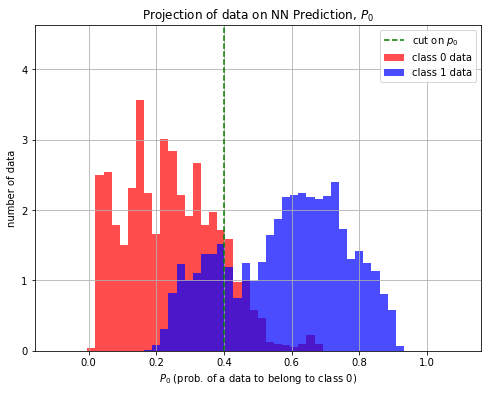

In [36]:
#=================================================================
# Plot) Histogramming of NN Prediction by P0(or P1) for Sig(or Bg) 
#=================================================================
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,6))

n_c0, b_c0, patch_c0 = ax.hist(data2_c0[:,3], bins=50, range=[-0.1,1.1], density=True, color='red', alpha=0.7, label='class 0 data')
n_c1, b_c1, patch_c1 = ax.hist(data2_c1[:,3], bins=50, range=[-0.1,1.1], density=True, color='blue', alpha=0.7, label='class 1 data')

n_c0_max = n_c0.max()
n_c1_max = n_c1.max()
n_max = max(n_c0_max, n_c1_max)

p0_cut = 0.4
ax.plot([p0_cut,p0_cut],[0,1.3*n_max],'g--', label='cut on $p_0$')

ax.grid(True)
ax.set_ylim(0, 1.3*n_max)

ax.set_title('Projection of data on NN Prediction, $P_0$')
ax.set_xlabel('$P_0$ (prob. of a data to belong to class 0)')
ax.set_ylabel('number of data')
ax.legend(loc='best')

fig.savefig(savefigfile)
plt.show()

In [37]:
#============================================
# Plot) ROC curve 
#============================================

# 두 클래스 데이터의 P0값(신경망의 예측값) 분포가 있을때, 
# 어떤 주어진 cut_on_P0 값에 대하여:
# P0+ / P0- : cut_on_P0 오른쪽 영역 / 왼쪽 영역

#               class 0    |    class 1
# ----------------------------------------------
# P0+ :    True Positive   |   False Positive
# ----------------------------------------------
# P0- :   False Negative   |   True Negative
# ----------------------------------------------

# 이때 다음과 같은 X, Y를 cut_on_P0에 대한 함수로 정의해보자.
# X(~class0 efficiency) = TP_rate = TP/(TP+FN)  => cut_on_P0의 함수
# Y(~class1 purity) = 1 - FP_rate = 1 - FP/(FP+TN) => 역시 cut_on_P0의 함수


# * TP = TP 인 데이터 갯수
# * FN = FN 인 데이터 갯수
# ...


# 이때 (X,Y)는 cut_on_P0를 파라메터로 하는 커브로 정의될 수 있으며, 
# 이를 ROC Curve라 한다 (ROC: Receiver Operating Characteristic, 작전요구성능) 

# ROC curve 를 그려보자...
